# Final project for discipline "Big Data Processing (BDA-3)"
## FINAL PROJECT, THEME: "Student Performance"

### IMPORTING LIBRARIES

In [216]:
import numpy as np #numpy
import matplotlib.pyplot as plt #for plotting 
import pandas as pd #pandas
import seaborn as sns # seaborn visualizing

from sklearn.compose import ColumnTransformer #tranfer column data
from sklearn.preprocessing import OneHotEncoder #for transformer we use OneHotEncoder

from sklearn.model_selection import train_test_split #for split data

from sklearn.linear_model import LinearRegression #model for regression

from sklearn import metrics #import library metrics for checking accuracy of prrediction model
from sklearn.metrics import mean_squared_error, r2_score #import library metrics for mean_squared_error, r2_score

%matplotlib inline

### LOADING DATA

In [217]:
dataset = pd.read_csv('student-por.csv') #read data

In [218]:
dataset.head(10) #look at the top 10 rows

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4.0,1.0,1.0,3.0,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3.0,1.0,1.0,3.0,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2.0,2.0,3.0,3.0,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2.0,1.0,1.0,5.0,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2.0,1.0,2.0,5.0,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2.0,1.0,NaN,5.0,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4.0,1.0,1.0,3.0,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4.0,1.0,1.0,1.0,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2.0,1.0,1.0,1.0,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1.0,1.0,1.0,5.0,0,12,12,13


### Understanding the data, Research

In [219]:
dataset.shape  #confirm the number of samples and features

(649, 33)

In [220]:
dataset.describe().T #some statistical charateristicks

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,647.0,3.185471,1.177540,1.0,2.0,3.0,4.0,5.0
Dalc,648.0,1.503086,0.925338,1.0,1.0,1.0,2.0,5.0


In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [222]:
#correlation
dataset.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112469,0.133809,0.086179,-0.006526,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.010201,-0.005928,-0.019350,0.002571,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.028051,0.001356,0.038671,0.045385,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057138,0.092249,0.056778,-0.047132,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075405,-0.137547,-0.214906,-0.056609,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.044907,0.105671,0.082152,0.036206,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089557,-0.076658,-0.093227,0.109533,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346297,0.109787,0.120568,0.084864,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112469,0.010201,0.028051,0.057138,-0.075405,0.044907,0.089557,0.346297,1.000000,0.244983,0.388689,-0.015780,0.085147,-0.073628,-0.079151,-0.087315
Dalc,0.133809,-0.005928,0.001356,0.092249,-0.137547,0.105671,-0.076658,0.109787,0.244983,1.000000,0.616521,0.059151,0.172709,-0.194555,-0.188924,-0.204288


<AxesSubplot:>

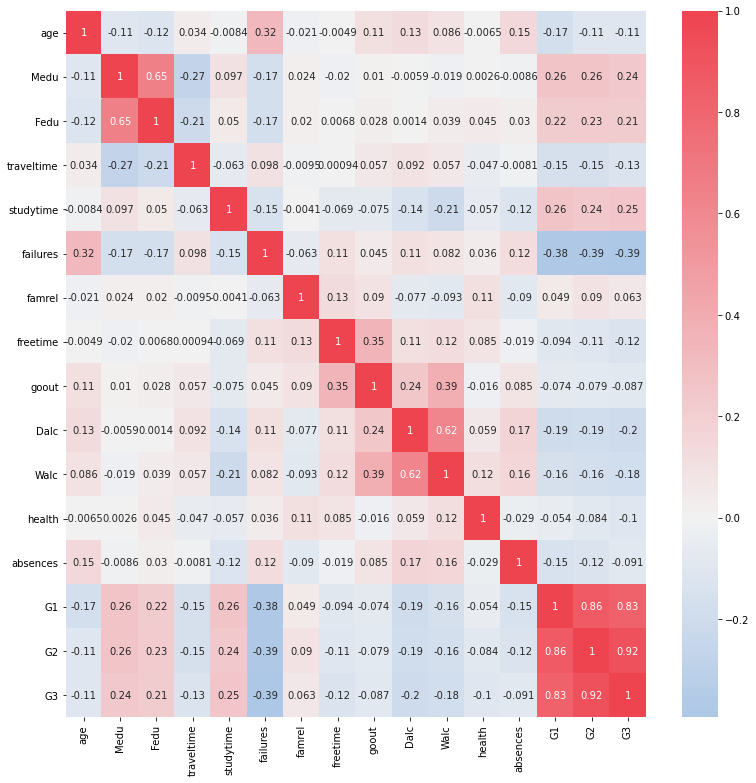

In [223]:
#correlation matrix
corrmat= dataset.corr()
plt.figure(figsize=(13,13))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)#heatmap to see correlation between attributes 

<AxesSubplot:xlabel='sex', ylabel='G3'>

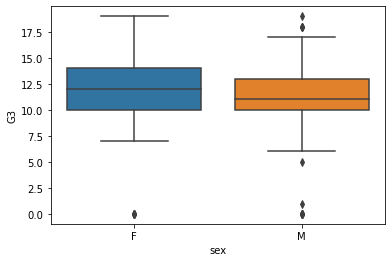

In [224]:
#comparing sex with G3
sns.boxplot(x="sex", y="G3", data=dataset)


## As you can see girls had better marks than boys

<AxesSubplot:xlabel='school', ylabel='G3'>

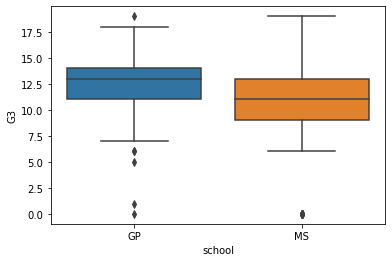

In [225]:
#comparing school with G3
sns.boxplot(x="school", y="G3", data=dataset)

# Gabriel Pereira school stydied better than Mousinho da Silveira

<AxesSubplot:xlabel='address', ylabel='G3'>

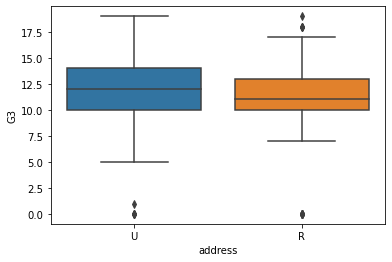

In [226]:
#comparing adress with G3
sns.boxplot(x="address", y="G3", data=dataset)

## 'U' - urban school stydied better than 'R' - rural

<AxesSubplot:xlabel='Fjob', ylabel='G3'>

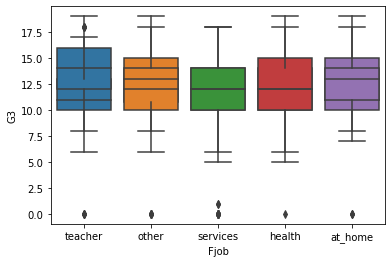

In [227]:
#comparing parent's jobs with G3
sns.boxplot(x="Mjob", y="G3", data=dataset)
sns.boxplot(x="Fjob", y="G3", data=dataset)

<AxesSubplot:xlabel='famsize', ylabel='G3'>

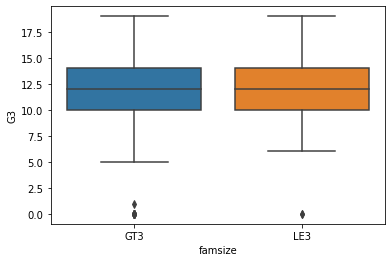

In [228]:
#comparing famsize with G3
sns.boxplot(x="famsize", y="G3", data=dataset)


#marks  are Approximately same for two both of family size (GT3 and LE3)

<AxesSubplot:xlabel='internet', ylabel='G3'>

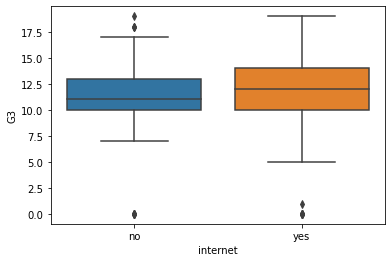

In [229]:
#comparing internet with G3
sns.boxplot(x="internet", y="G3", data=dataset)


# students who have nternet access at home stydied better

## Create X and Y data (split to Features and Target values)

In [230]:
X = dataset.iloc[:, :-1] # x values
Y = dataset.iloc[:, -1] #y values

In [231]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4.0,1.0,1.0,3.0,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3.0,1.0,1.0,3.0,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2.0,2.0,3.0,3.0,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2.0,1.0,1.0,5.0,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2.0,1.0,2.0,5.0,0,11,13


In [232]:
Y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

## Clean the dataset 

#### Checking Null Cases

In [233]:
# check for the Null values
X.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         2
Dalc          1
Walc          1
health        1
absences      0
G1            0
G2            0
dtype: int64

In [234]:
# % of missing.
for col in X.columns:
    pct_missing = np.mean(X[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 4)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.3082%
Dalc - 0.1541%
Walc - 0.1541%
health - 0.1541%
absences - 0.0%
G1 - 0.0%
G2 - 0.0%


In [235]:
# check for the Null values
Y.isnull().sum()

0

In [236]:
print(X['goout'].isnull().unique())

[False  True]


<AxesSubplot:>

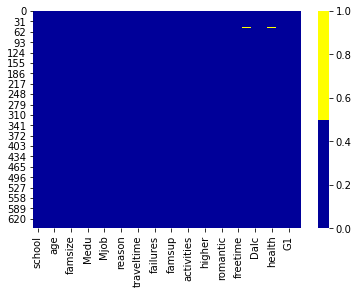

In [237]:
cols = X.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(X[cols].isnull(), cmap=sns.color_palette(colours))

#visualize the missing data via heatmap

### Taking care of missing data

In [238]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X.iloc[:, 25:29])
X.iloc[:, 25:29] = imputer.transform(X.iloc[:, 25:29])

In [239]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4.0,1.0,1.0,3.0,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3.0,1.0,1.0,3.0,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2.0,2.0,3.0,3.0,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2.0,1.0,1.0,5.0,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2.0,1.0,2.0,5.0,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2.0,1.0,2.0,5.0,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4.0,1.0,1.0,1.0,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1.0,1.0,1.0,5.0,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5.0,3.0,4.0,2.0,6,10,10


## After cleaning

In [242]:
# check for the Null values
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         2
Dalc          1
Walc          1
health        1
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Irregular data (Outliers)

In [190]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,647.0,3.185471,1.177540,1.0,2.0,3.0,4.0,5.0
Dalc,648.0,1.503086,0.925338,1.0,1.0,1.0,2.0,5.0


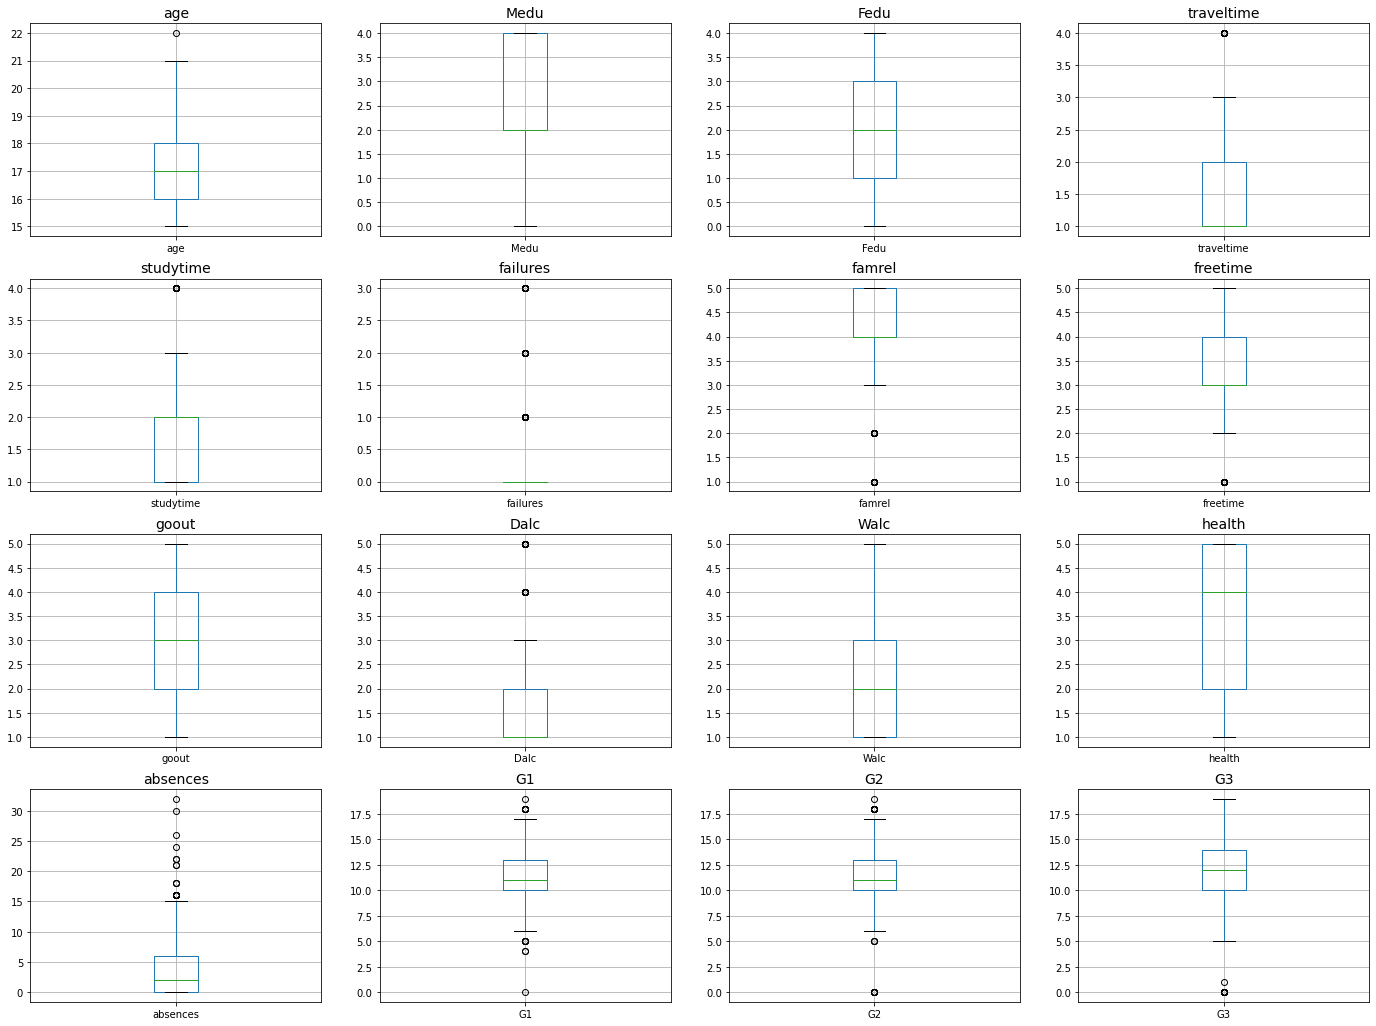

In [240]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
# box plot.
figure, axes = plt.subplots(ncols=4, nrows = 4, figsize=(24, 18))

h = 0
for i in range(4):
    for j in range(4):
        dataset.boxplot(column= cols[h] ,  ax=axes[i][j])
        axes[i][j].set_title(cols[h] , fontsize = 14)
        h+=1





## Encoding categorical Data 

In [194]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [195]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 3, 4, 5,8, 9, 10,11, 
                                                                   15, 16,17,18,19,20,21,22])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [196]:
X

array([[ 1.,  0.,  1., ...,  4.,  0., 11.],
       [ 1.,  0.,  1., ...,  2.,  9., 11.],
       [ 1.,  0.,  1., ...,  6., 12., 13.],
       ...,
       [ 0.,  1.,  1., ...,  6., 11., 12.],
       [ 0.,  1.,  0., ...,  6., 10., 10.],
       [ 0.,  1.,  0., ...,  4., 10., 11.]])

## Splitting the dataset into the Training set and Test set

#### **Perform 80/20 Data split**

In [197]:
# split the data to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [198]:
print(X_train)

[[ 1.  0.  1. ...  2. 12. 12.]
 [ 0.  1.  1. ...  0. 14. 13.]
 [ 1.  0.  0. ...  0. 11. 11.]
 ...
 [ 1.  0.  1. ...  2. 13. 11.]
 [ 1.  0.  1. ... 12. 12. 12.]
 [ 1.  0.  0. ...  4. 13. 13.]]


In [199]:
print(X_test)

[[ 0.  1.  0. ...  0.  7.  0.]
 [ 1.  0.  0. ...  2.  9. 10.]
 [ 0.  1.  1. ...  9.  9.  8.]
 ...
 [ 0.  1.  1. ...  0.  5.  0.]
 [ 1.  0.  1. ...  2. 10.  9.]
 [ 0.  1.  1. ...  0.  6.  8.]]


In [200]:
print(Y_train)

354    15
495    13
307    14
90     11
577    11
       ..
144    11
645    16
72     11
235    12
37     13
Name: G3, Length: 519, dtype: int64


In [201]:
print(Y_test)

440     0
242    11
465     8
347     8
474    11
       ..
62     10
419    11
603     0
385    10
428     9
Name: G3, Length: 130, dtype: int64


## Train the Regression model on the Training set

In [202]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
# calculates a regression line’s slope (coefs) and intercept for a given set of data points

LinearRegression()

In [203]:
regressor.coef_ #coeficient values

array([ 1.14870357e-01, -1.14870357e-01,  3.70387816e-02, -3.70387816e-02,
       -8.56039167e-02,  8.56039167e-02, -1.31914623e-02,  1.31914623e-02,
        4.36815100e-02, -4.36815100e-02, -1.19676760e-01,  1.91267550e-01,
       -1.40459547e-01, -2.79931696e-02,  9.68619258e-02,  3.78296696e-01,
       -1.56792021e-01,  6.02610744e-02,  2.45167188e-03, -2.84217420e-01,
        1.98766040e-01,  2.56942688e-02, -3.20529441e-01,  9.60691320e-02,
       -3.91304306e-02, -5.70075403e-02,  9.61379709e-02,  1.12456255e-01,
       -1.12456255e-01, -5.48539260e-02,  5.48539260e-02,  1.62549419e-01,
       -1.62549419e-01, -3.74565508e-02,  3.74565508e-02,  7.28518047e-04,
       -7.28518047e-04, -2.03303990e-01,  2.03303990e-01, -6.79247526e-02,
        6.79247526e-02,  1.24340779e-02, -1.24340779e-02,  1.66278785e-02,
       -1.37624700e-01,  6.97167460e-02,  1.18323888e-01,  5.31602836e-02,
       -2.02250267e-01, -1.82364796e-02, -4.06884251e-02, -4.42158390e-02,
        4.87415101e-02, -

In [204]:
regressor.intercept_ #intercept value

0.3682128172870094

## Predicting the Test set results

In [205]:
Y_pred = regressor.predict(X_test)

In [206]:
dfp = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
dfp
# the actual and predicted values

,Actual,Predicted
440,0,1.285040
242,11,10.785430
465,8,8.639737
347,8,7.591301
474,11,11.489535
...,...,...
62,10,13.611378
419,11,10.731434
603,0,1.154525
385,10,10.223675


## Visualising the Training set results

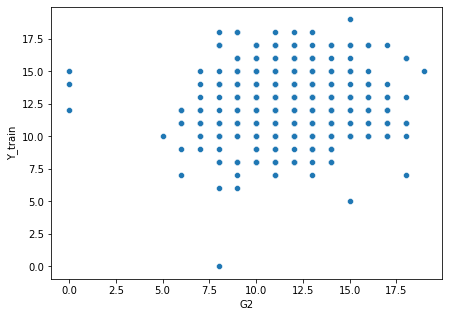

In [207]:
df = pd.DataFrame()
df['G2'] = pd.Series(X_train[:, -1])
df['Y_train'] = pd.Series(Y_train)
figure = plt.figure(figsize=(7,5))
axes = sns.scatterplot(data=df, x='G2', y='Y_train', palette='cool')

## Visualising the Test set results

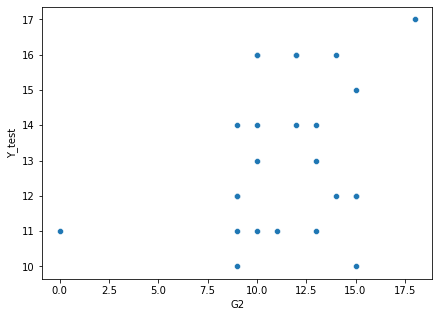

In [208]:
df = pd.DataFrame()
df['G2'] = pd.Series(X_test[:, -1])
df['Y_test'] = pd.Series(Y_test)
figure = plt.figure(figsize=(7,5))
axes = sns.scatterplot(data=df, x='G2', y='Y_test', palette='cool')

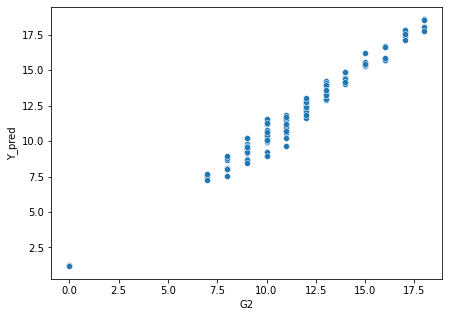

In [209]:
df = pd.DataFrame()
df['G2'] = pd.Series(X_test[:, -1])
df['Y_pred'] = pd.Series(Y_pred)
figure = plt.figure(figsize=(7,5))
axes = sns.scatterplot(data=df, x='G2', y='Y_pred', palette='cool')

## R2 to determine the correlation between the dependent and independent variables

In [210]:

print('Coefficient of determination (R^2): ',  r2_score(Y_test, Y_pred))

Coefficient of determination (R^2):  0.8571514962981409


In [211]:
# and other metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.806822429503991
Mean Squared Error: 1.9186413613480056
Root Mean Squared Error: 1.3851503028003875


## Make future predictions from your dataset

In [212]:
#Create mine new value
mine = np.array([[ 1, 0, 1, 0, 0, 1,  1,  0,  0,  1,
        0, 0, 0, 0,  1, 0,  1,  0,  0,  0, 0,  0,  0,  1,  0,1,  0,  1,  0,  0,
        1,  1,  0,  1,  0,0,  1,  0,  1,  0, 1,  1,  0, 15,  4, 4,  1,  2,  0,  3,
        3,  3.18547141,  1.50308642,  2,  2, 2, 14, 14.]])

In [213]:
mine

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        , 15.        ,  4.        ,
         4.        ,  1.        ,  2.        ,  0.        ,  3.        ,
         3.        ,  3.18547141,  1.50308642,  2.        ,  2.        ,
         2.        , 14.        , 14.        ]])

In [214]:
mine_pred = regressor.predict(mine)
print(mine_pred)

[14.57221269]


In [215]:
#THANK YOU!